Mean Shift는 확률밀도 함수를 이용하여 데이터의 분포가 가장 밀집되어 있는 곳을 군집을 한다.
가정은 가장 밀집되어 있는 곳이 중심으로 생각하고 그 중심을 기준으로 군집화 한다는 가정이다.

KMeans와 다르게 군집의 개수를 지정할 필요가 없다. 대역폭의 크기에 따라 알고리즘 자체에서 군집의 개수를 최적으로 정한다.
그렇기 때문에, 대역폭 크기를 어떤 값으로 설정하는가에 따라 군집화의 품질이 결정된다.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

meanshift에서는 fit하고 predict을 해줘야 해당 값을 출력할 수 있다.

In [2]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.8, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형', np.unique(cluster_labels))

cluster labels 유형 [ 0  1  2  3  4  5  6  7  8  9 10]


In [3]:
cluster_labels

array([ 3,  0,  2,  7,  4,  8,  0,  5,  8,  2,  2,  3,  0,  6,  3,  8,  1,
        1,  1,  5,  1,  0,  4,  0,  3,  4,  1,  4,  4,  2,  1,  2,  0,  3,
        0,  8,  0,  2,  2,  1,  1,  1,  1,  2,  4,  0,  5,  7,  1,  2,  1,
        0,  6,  1,  5,  1,  0,  3,  1,  3,  7,  2,  3,  2,  1,  2,  4,  7,
        6,  0,  3,  4,  2,  5,  0,  1,  0,  6,  3,  3,  1,  2,  3,  9,  0,
        2,  5,  3,  0,  0,  1,  1,  7,  2,  8,  4,  0,  1,  5,  2,  1,  3,
        3,  1,  1,  0,  2,  3,  3,  2,  1,  0,  0,  4,  4,  2,  9,  0,  1,
        5,  7, 10,  2,  3,  5,  6,  5,  0,  4,  2,  6,  5,  2,  1,  1,  0,
        1,  7,  3,  1,  4,  0,  3,  4, 10,  3,  2,  3,  6,  7,  1,  1,  5,
        0,  4,  2,  1,  0,  1,  5,  7,  3,  3,  0,  0,  1,  5,  4,  3,  6,
        5,  5,  0,  1,  7,  1,  2,  2,  0,  6,  5,  3,  2,  4,  2,  0,  0,
        1,  2,  1,  4,  4,  2,  1,  0,  0,  0,  2,  1,  5], dtype=int64)

In [4]:
meanshift = MeanShift(bandwidth=1)
meanshift.fit(X)

print('cluster labels 유형:', np.unique(meanshift.labels_))

cluster labels 유형: [0 1 2 3 4 5 6]


In [5]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)

print('cluster labels 유형:', np.unique(meanshift.labels_))

cluster labels 유형: [0 1 2 3 4 5 6]


estimate_bandwidth는 파라미터로 피처 데이터 세트를 입력하면 최적화된 bandwidth 값을 반환해줍니다.

In [6]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.2)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.745


In [7]:
cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
cluster_df['target'] = y

best_bandwidth = estimate_bandwidth(X, quantile = 0.2)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

print('Cluster labels 유형:', np.unique(cluster_labels))

Cluster labels 유형: [0 1 2 3]


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

cluster_centers_ 속성으로 군집 중심 좌표를 표시할 수 있다.

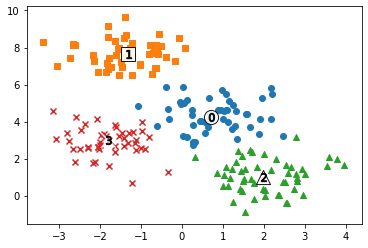

In [9]:
cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label'] == label]
    center_x_y = centers[label]
    
    plt.scatter(label_cluster['ftr1'], label_cluster['ftr2'], marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', alpha=0.9, marker='$%d$' % label)
    


In [10]:
cluster_df.head()

,ftr1,ftr2,target,meanshift_label
0,2.293858,1.958772,1,2
1,-0.897842,2.544747,2,3
2,1.118211,3.982363,0,0
3,-3.052707,7.017455,3,1
4,1.459464,0.236513,1,2


In [11]:
centers

array([[ 0.72514705,  4.25508967],
       [-1.30400405,  7.64172815],
       [ 1.97802542,  0.98187841],
       [-1.79007666,  2.9784335 ]])

In [12]:
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  49
        2                   1
1       2                  50
2       3                  46
        0                   3
        2                   1
3       1                  50
Name: meanshift_label, dtype: int64


실루엣 계수와 실루엣 스코어를 구해서 얼마나 군집화가 잘 됐는지 확인해보자.

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
score_samples = silhouette_samples(cluster_df[['ftr1','ftr2']], cluster_df['meanshift_label'])
print('silhoutette_samples() return 값의 shape', score_samples.shape)

cluster_df['silhouette_coeff'] = score_samples

silhoutette_samples() return 값의 shape (200,)


In [15]:
cluster_df.head()

,ftr1,ftr2,target,meanshift_label,silhouette_coeff
0,2.293858,1.958772,1,2,0.519753
1,-0.897842,2.544747,2,3,0.507130
2,1.118211,3.982363,0,0,0.652600
3,-3.052707,7.017455,3,1,0.541179
4,1.459464,0.236513,1,2,0.668139


In [16]:
average_score = silhouette_score(cluster_df[['ftr1','ftr2']], cluster_df['meanshift_label'])
print('붓꽃 데이터 세트 silhouette Analysis Score:{:.3f}'.format(average_score))

붓꽃 데이터 세트 silhouette Analysis Score:0.575


In [17]:
cluster_df.groupby('target')['silhouette_coeff'].mean()

target
0    0.489099
1    0.587077
2    0.550301
3    0.673163
Name: silhouette_coeff, dtype: float64

In [18]:
cluster_df.groupby('meanshift_label')['silhouette_coeff'].mean()

meanshift_label
0    0.476476
1    0.673163
2    0.566266
3    0.589159
Name: silhouette_coeff, dtype: float64